* Describe what a deep neural network is.
* Implement deep neural networks in Pytorch.
* Build a deep Neural network in PyTorch using nn.Module list.
* Define dropout.
* Implement the dropout method in PyTorch.
* Create a layer.
* Discuss the initialization of the weights in a Neural Network.
* Discuss the problem of not initializing the Weights in a Neural Network model correctly and how to fix it.
* List different initializing methods in Pytorch.
* Explain what gradient descent with momentum is, and its applications in optimizing paramaters.
* Describe what batch normalization is and use it in Pytorch.
* Discuss why batch normalization works.

## What is Deep Neural Networks?
Adding more neurons in the layer will make a complex decision function to classify non-linearly separable data, but this also increase the chances of overfitting. By adding more hidden layers, we usally increase the performance of our model, while decreasing the risk of overfitting.

also, if a network has more than one hidden layer, then it is called deep neural network.

## Deep Neural Network of 2 Hidden Layer and testing sigmoid, tanh and relu Activation functions with MNIST Dataset. 

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

#manually seeding
torch.manual_seed(2)

#create the model class using sigmoid as the activation function
class Net(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(Net, self).__init__()
        self.linear1= nn.Linear(D_in, H1)
        self.linear2= nn.Linear(H1, H2)
        self.linear3= nn.Linear(H2, D_out)

    def forward(self, x):
        x= torch.sigmoid(self.linear1(x))
        x= torch.sigmoid(self.linear2(x))
        x= self.linear3(x)
        return x

#create the model class using tanh as the activation function
class NetTanh(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh,self).__init__()
        self.linear1= nn.Linear(D_in, H1)
        self.linear2= nn.Linear(H1, H2)
        self.linear3= nn.Linear(H2, D_out)

    def forward(self, x):
        x= torch.tanh(self.linear1(x))
        x= torch.tanh(self.linear2(x))
        x= self.linear3(x)
        return x


# Create the model class using Relu as a activation function
class NetRelu(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x



# function to train the model
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    useful_stuff = {'training_loss': [], 'validation_accuracy': []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()

        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff


#load the training and validation dataset
train_dataset = dsets.MNIST(root='./resources/data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./resources/data', train=False, download=True, transform=transforms.ToTensor())


# Create the criterion function
criterion = nn.CrossEntropyLoss()


# Create the training data loader and validation data loader object
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)


# Set the parameters for create the model
input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10


# Set the number of iterations
cust_epochs = 10


100%|██████████| 9912422/9912422 [00:00<00:00, 134435240.17it/s]


Extracting ./resources/data/MNIST/raw/train-images-idx3-ubyte.gz to ./resources/data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 82686480.43it/s]


Extracting ./resources/data/MNIST/raw/train-labels-idx1-ubyte.gz to ./resources/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 166519584.82it/s]

Extracting ./resources/data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./resources/data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13257152.94it/s]

Extracting ./resources/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./resources/data/MNIST/raw



In [2]:
# Train the model with sigmoid function
learning_rate = 0.01
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [3]:
# Train the model with tanh function
learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

In [4]:
# Train the model with relu function
learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=cust_epochs)

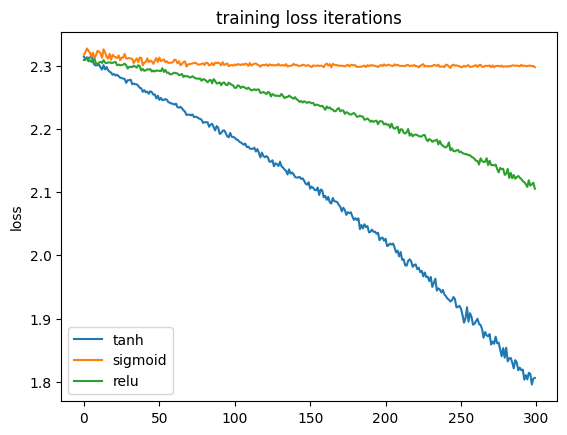

In [7]:
# Compare the training loss
plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

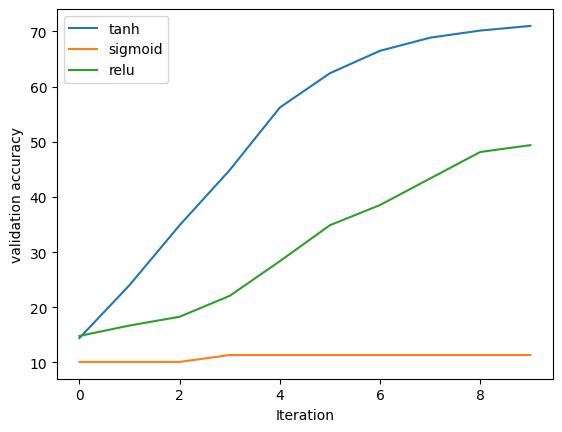

In [8]:
# Compare the validation loss
plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu')
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')
plt.legend()